<a href="https://colab.research.google.com/github/Revanthch/INFO-5502/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [ ]:
### You code here:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings("ignore")

#Reading CSV Dataset from github repo
training_dataset = "https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv"
testing_dataset = "https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/test_luc.csv"

#convert dataset to pandas dataframe to enable easy reading
df_train = pd.read_csv(training_dataset, header=0)
df_train['Year'] = pd.to_datetime(df_train['datetime']).dt.strftime('%Y')
df_train['Month']=pd.to_datetime(df_train['datetime']).dt.strftime('%m')
df_train['Day']=pd.to_datetime(df_train['datetime']).dt.strftime('%d')
df_train['hour']=pd.to_datetime(df_train['datetime']).dt.strftime('%H')

df_test = pd.read_csv(testing_dataset, header=0)
df_test['Year'] = pd.to_datetime(df_test['datetime']).dt.strftime('%Y')
df_test['Month']=pd.to_datetime(df_test['datetime']).dt.strftime('%m')
df_test['Day']=pd.to_datetime(df_test['datetime']).dt.strftime('%d')
df_test['hour']=pd.to_datetime(df_test['datetime']).dt.strftime('%H')

df_train.sort_index(axis=1, inplace=True)
df_train.describe()
print(df_train.head(5))

  




  Day Month  Year   atemp  casual  count             datetime  holiday hour  \
0  01    01  2011  14.395       3     16  2011-01-01 00:00:00        0   00   
1  01    01  2011  13.635       8     40  2011-01-01 01:00:00        0   01   
2  01    01  2011  13.635       5     32  2011-01-01 02:00:00        0   02   
3  01    01  2011  14.395       3     13  2011-01-01 03:00:00        0   03   
4  01    01  2011  14.395       0      1  2011-01-01 04:00:00        0   04   

   humidity  registered  season  temp  weather  windspeed  workingday  
0        81          13       1  9.84        1        0.0           0  
1        80          32       1  9.02        1        0.0           0  
2        80          27       1  9.02        1        0.0           0  
3        75          10       1  9.84        1        0.0           0  
4        75           1       1  9.84        1        0.0           0  


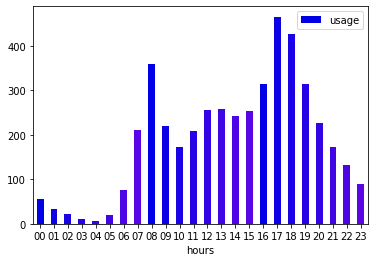

In [ ]:
diff_colors = [(x/20, x/300.0, 0.9) for x in range(8)]
hours = np.unique(df_train['hour'])
df = {}
for col in hours:
    df1 = df_train.loc[df_train['hour'] == col]
    df[col] = df1['count'].mean()   
df3 = pd.DataFrame({'hours':list(df.keys()),'usage':list(df.values()) })
df3.plot.bar(x='hours', y='usage', color=diff_colors, rot=0)

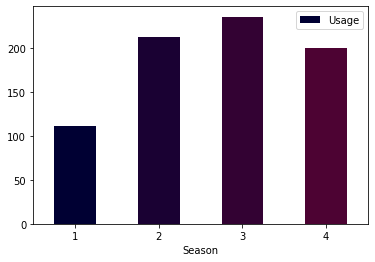

In [ ]:
season_col = np.unique(df_train['season'])
diff_colors = [(x/10, x/300.0, 0.2) for x in range(5)]

df = {}
for col in season_col:
    df2 = df_train.loc[df_train['season'] == col]
    df[col] = df2['count'].mean()
df3 = pd.DataFrame({'Season': list(df.keys()),'Usage':list(df.values())})
df3.plot.bar(x='Season', y='Usage', color=diff_colors, rot=0)

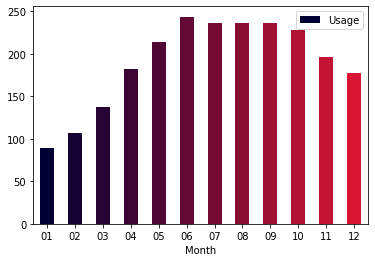

In [ ]:
Month_col = np.unique(df_train['Month'])
diff_colors = [(x/13, x/130.0, 0.2) for x in range(12)]
df = {}
for col in Month_col:
    df1 = df_train.loc[df_train["Month"] == col]
    df[col] = df1['count'].mean()
df3 = pd.DataFrame({'Month':list(df.keys()),'Usage':list(df.values())})
df3.plot.bar(x='Month', y='Usage',color=diff_colors, rot=0)

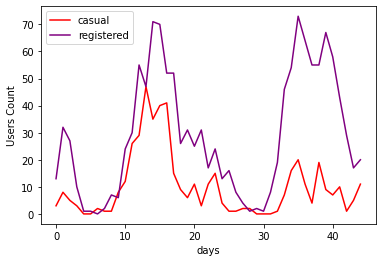

In [ ]:
# visual representation of casual and registered users for last 45 days
axes=pt.gca()
df_train[['casual']][:45].plot(kind='line',color='red',ax=axes)
df_train[['registered']][:45].plot(kind='line',color='purple',ax=axes)
pt.xlabel("days")
pt.ylabel("Users Count")
pt.show()


In [ ]:
required_cols = ["hour","Month","season"] 
df_train[required_cols]

,hour,Month,season
0,00,01,1
1,01,01,1
2,02,01,1
3,03,01,1
4,04,01,1
...,...,...,...
9169,19,12,4
9170,20,12,4
9171,21,12,4
9172,22,12,4


In [ ]:
X = df_train[required_cols]
y = df_train['count'].values
casual_users=df_train['casual'].values
reg_users=df_train['registered'].values

X = preprocessing.scale(X) 
y = preprocessing.scale(y) 
casual_users= preprocessing.scale(casual_users)
reg_users= preprocessing.scale(reg_users)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
X_train_registered,X_test_registered,y_train_registered,y_test_registered = train_test_split(X,reg_users,test_size=0.2)
X_train_casual,X_test_casual,y_train_casual,y_test_casual = train_test_split(X,casual_users,test_size=0.2)

RMS error total users: 0.7104982922205733


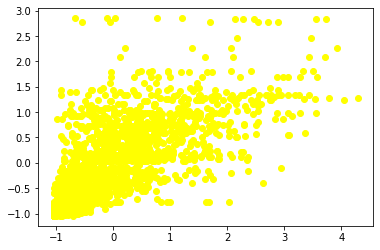

In [ ]:
model = KNeighborsRegressor(n_neighbors = 3)

model.fit(X_train, y_train)
prediction_count = model.predict(X_test)
Error_RMS = np.sqrt(mean_squared_error(y_test,prediction_count))
print("RMS error total users:",Error_RMS)
pt.scatter(y_test,prediction_count,color='yellow')
pt.show()

RMS error for casual bike drivers: 0.8175599381693347


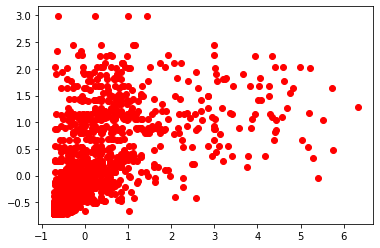

In [ ]:
model.fit(X_train_casual, y_train_casual)
pred_casual = model.predict(X_test_casual)
Error_RMS_casual=np.sqrt(mean_squared_error(y_test_casual,pred_casual))
print("RMS error for casual bike drivers:",Error_RMS_casual)
pt.scatter(y_test_casual,pred_casual,color='red')
pt.show()

RMS error for registered bike drivers: 0.7270080925479865


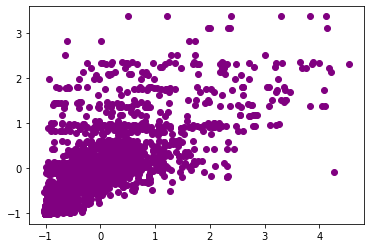

In [ ]:
model.fit(X_train_registered, y_train_registered)
pred_reg = model.predict(X_test_registered)
Error_RMS_registered=np.sqrt(mean_squared_error(y_test_registered,pred_reg))
print("RMS error for registered bike drivers:",Error_RMS_registered)
pt.scatter(y_test_registered,pred_reg,color='purple')
pt.show()

In [ ]:
#testing on test_data csv using trained model
model.fit(df_train[required_cols], df_train['count'])
model.fit(df_train[required_cols], df_train['registered'])
model.fit(df_train[required_cols], df_train['casual'])
test_pred_count = model.predict(df_test[required_cols])
test_casual_count=model.predict(df_test[required_cols])
test_registered_count=model.predict(df_test[required_cols])
df_test['casual']=test_casual_count
df_test['registered']=test_registered_count
df_test['count'] = test_pred_count
df_test['sum_count']=df_test['casual']+df_test['registered']

In [ ]:
test_pred_count = model.predict(df_test[required_cols])
test_casual_count=model.predict(df_test[required_cols])
test_registered_count=model.predict(df_test[required_cols])
df_test['casual']=test_casual_count
df_test['registered']=test_registered_count
df_test['count'] = test_pred_count
df_test['sum_count']=df_test['casual']+df_test['registered']
df_test = df_test[['datetime','count']].to_csv('my_prediction.csv', header=True, index=False)

In [ ]:
final_data = pd.read_csv("my_prediction.csv")
print(final_data.head(5))

              datetime     count
0  2011-01-17 00:00:00  1.666667
1  2011-01-17 01:00:00  3.000000
2  2011-01-17 02:00:00  2.000000
3  2011-01-17 03:00:00  1.666667
4  2011-01-17 04:00:00  0.666667


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [1]:
### You code here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
second_df = pd.read_csv("https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/portfolio_data.csv", header=0)
second_df.describe()






,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


In [2]:
second_df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [4]:

def plot_graph(stock_name, color, Company_name):
  plot.plot(second_df['Date'],second_df[str(stock_name)], color=str(color))
  plot.xlabel("Stock value")
  plot.title(str(Company_name))

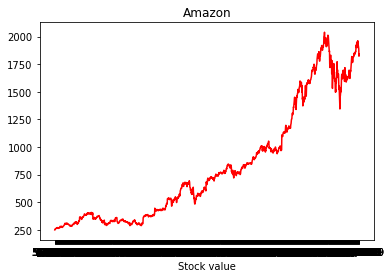

In [5]:
plot_graph("AMZN","red","Amazon")

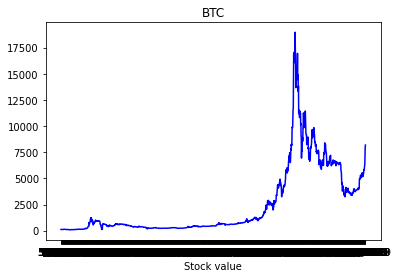

In [6]:
plot_graph("BTC","blue","BTC")

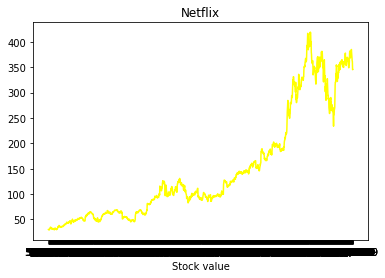

In [7]:
plot_graph("NFLX","yellow","Netflix")

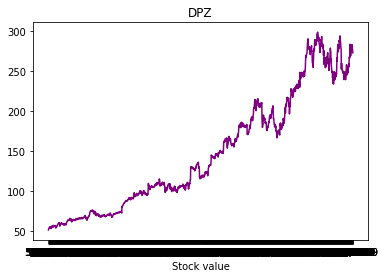

In [8]:
plot_graph("DPZ","purple","DPZ")

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
def rms_error_r2_score( stock_company):
    x = second_df.drop(['Date', str(stock_company)], axis = 1)
    y = second_df[str(stock_company)]
    stock_train, stock_test, stock_train_1, stock_test_1 = train_test_split(x, y, test_size = 0.1, random_state = 1)
    dt_reg = DecisionTreeRegressor()
    dt_reg.fit(stock_train, stock_train_1)
    predict_val = dt_reg.predict(stock_test)
    print("Root Mean Squared Error(RMS)  "+stock_company+ " : ",np.sqrt(mean_squared_error(stock_test_1, predict_val)))
    print("R2 Score  "+stock_company+ " : ", r2_score(stock_test_1, predict_val))

In [10]:
rms_error_r2_score('BTC')

Root Mean Squared Error(RMS)  BTC :  602.9038453327865
R2 Score  BTC :  0.9517901434323589


In [11]:
rms_error_r2_score('NFLX')

Root Mean Squared Error(RMS)  NFLX :  8.610208293320344
R2 Score  NFLX :  0.9926141338664134


In [12]:
rms_error_r2_score('AMZN')

Root Mean Squared Error(RMS)  AMZN :  23.873664017614217
R2 Score  AMZN :  0.9975296424754452


In [13]:
rms_error_r2_score('DPZ')

Root Mean Squared Error(RMS)  DPZ :  5.298238655584018
R2 Score  DPZ :  0.9939978378261096
